In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm   

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [77]:
df=pd.read_csv("brooklyn_sales_map.csv", encoding="ISO-8859-1")
df.head()


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


In [3]:
df2=df.copy()             #for safeimputation 

In [80]:
df=df2.copy()

In [78]:
df=df[df.sale_price > 0]

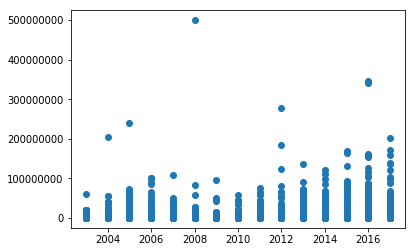

In [79]:
##According to the visualisation, the highest recorded sale between 2003 and 2017 was for around $500million in 2008. 
#Given how much of an outlier this sale is, we assume that this is either factory, retail or commercial space.
plt.scatter(x=df['year_of_sale'],y=df['sale_price'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

In [80]:
##To better explore the mean, maximum and minimum prices,
.
df['sale_price'].describe().apply(lambda x: format(x, 'f'))

count       250740.000000
mean        789988.476127
std        2900768.102545
min              1.000000
25%         300000.000000
50%         496860.000000
75%         755000.000000
max      499401179.000000
Name: sale_price, dtype: object

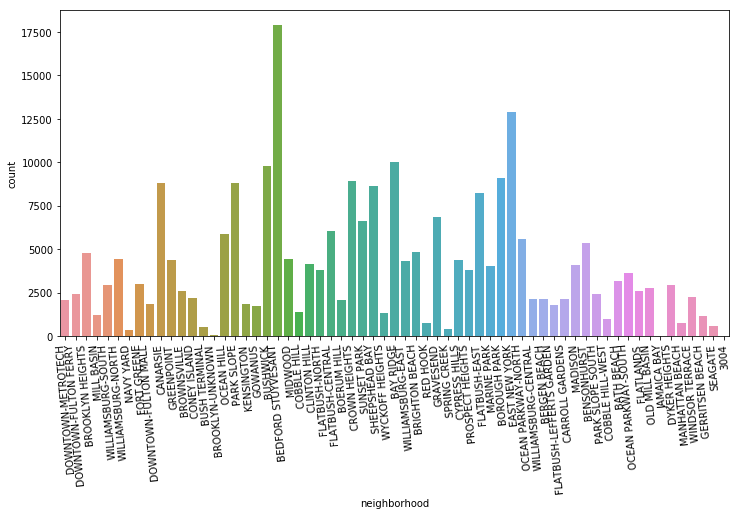

In [81]:
##Count Plot for Neighborhood
plt.figure(figsize = (12, 6))
sns.countplot(x = 'neighborhood', data = df)
xt = plt.xticks(rotation=95)
#major building flats are of the bedford stuvyesant neighborhood we cldn

In [61]:
df.shape

(250740, 111)

In [83]:
df= df.drop_duplicates()
df.shape                        #there are no duplicates in the dataset li

(250740, 111)

In [65]:
df.isnull().sum()


Unnamed: 0                      0
borough                         0
neighborhood                    0
building_class_category        17
tax_class                    3560
block                           0
lot                             0
easement                   250740
building_class               3560
address                         1
apartment_number           193218
zip_code                        0
residential_units               0
commercial_units                0
total_units                     0
land_sqft                       0
gross_sqft                      0
year_built                      0
tax_class_at_sale               0
building_class_at_sale          0
sale_price                      0
sale_date                       0
year_of_sale                    0
Borough                     57688
CD                          57688
CT2010                      57726
CB2010                      57954
SchoolDist                  57705
Council                     57688
ZipCode       

In [84]:
columns=df.columns[df.isnull().mean() > 0.8]    #80% of column is NA

df.drop(columns, inplace=True, axis=1)
columns

Index(['easement', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'OwnerType',
       'Ext', 'HistDist', 'Landmark', 'ZMCode', 'EDesigNum', 'APPDate',
       'FIRM07_FLA', 'PFIRM15_FL'],
      dtype='object')

In [85]:
df.shape
(131484, 92)

(131484, 92)

In [508]:
df.columns

Index(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'building_class', 'address', 'zip_code',
       'residential_units', 'commercial_units', 'total_units', 'land_sqft',
       'gross_sqft', 'year_built', 'tax_class_at_sale',
       'building_class_at_sale', 'sale_price', 'sale_date', 'year_of_sale',
       'Borough', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode',
       'FireComp', 'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'Exemp

In [86]:
df=df.dropna(thresh=21)       #that is almost all columns are empty so drop those rows entirely
df.shape                   # 87155 lost
#df.drop(col

(247215, 92)

In [8]:
df.columns

Index(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'building_class', 'address',
       'apartment_number', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'sale_date', 'year_of_sale', 'Borough', 'CD', 'CT2010', 'CB2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'SanitBoro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'SplitZone', 'BldgClass', 'LandUse',
       'Easements', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',

In [9]:
for col in df.columns:
    print(df[col].value_counts())

2047      1
82813     1
17245     1
19292     1
29531     1
31578     1
25433     1
27480     1
4951      1
6998      1
853       1
2900      1
13139     1
15186     1
9041      1
11088     1
54095     1
56142     1
49997     1
52044     1
62283     1
64330     1
58185     1
60232     1
37703     1
39750     1
33605     1
35652     1
45891     1
23390     1
         ..
122769    1
10158     1
22432     1
16301     1
14252     1
4011      1
1962      1
8105      1
6056      1
28583     1
26534     1
32677     1
30628     1
20387     1
18338     1
110495    1
116626    1
108446    1
114589    1
112540    1
102299    1
100250    1
106393    1
104344    1
126871    1
124822    1
130965    1
128916    1
118675    1
2049      1
Name: Unnamed: 0, Length: 247215, dtype: int64
3    247215
Name: borough, dtype: int64
BEDFORD STUYVESANT          17514
EAST NEW YORK               12714
BAY RIDGE                    9978
BUSHWICK                     9623
BOROUGH PARK                 8871
CANARSIE   

D4    30831
R4    27768
B1    22250
C0    21922
B3    14245
B2    13376
A5    10907
B9     9408
A1     9036
A9     8700
C6     8206
R1     7906
R3     5785
C3     5678
R2     5486
C2     5441
S2     4565
C1     3811
V0     3174
A2     2076
R5     2009
S1     1705
A4     1576
V1     1532
S9     1143
K1     1077
R6      961
S3      894
G7      856
S4      838
      ...  
M2        2
L1        2
Y6        2
T2        2
Y2        2
U9        2
K8        1
U6        1
W6        1
Z8        1
O3        1
H6        1
Y4        1
Q7        1
HR        1
Q1        1
Z7        1
N3        1
V5        1
U5        1
RH        1
J9        1
Y3        1
T9        1
U2        1
HB        1
V4        1
Y1        1
Q3        1
U4        1
Name: building_class_at_sale, Length: 181, dtype: int64
10.0          3445
450000.0      2383
400000.0      2203
600000.0      2168
550000.0      2070
650000.0      2023
350000.0      1963
300000.0      1931
500000.0      1780
700000.0      1707
750000.0      1686
250

R6           40158
R5           32490
R6B          28057
R4           19901
R5B          10709
R7A           9915
R6A           9066
R3-2          6847
R4-1          6777
R7-1          4783
R3-1          3232
M1-1          3005
R7B           2543
R2            2261
R4A           1447
R8X           1347
M1-2          1176
R3X            850
M1-2D          584
C4-3           539
C5-2A          505
M1-2/R6A       497
C8-2           464
R4B            445
R8A            415
M2-1           376
M1-4           362
M3-1           362
C8-1           336
R8             299
             ...  
C3              68
M1-1D           65
C4-5D           63
C7              40
C4-4D           37
M3-2            32
M1-1/R7D        29
M1-1/R5         26
C6-2            20
C6-1            20
C4-1            19
R7X             13
M1-4/R8A        11
M1-6            11
C6-2A           10
M1-2/R8A         8
R3A              8
R7-3             6
M1-4/R6A         6
C4-4             5
M1-3             5
C4-5X       

N    155710
Y     37327
Name: IrrLotCode, dtype: int64
5.0    164937
3.0     26110
4.0       736
6.0       650
1.0       241
0.0       148
2.0       147
8.0        61
7.0         5
9.0         2
Name: LotType, dtype: int64
2.0    92688
5.0    48401
1.0    44062
0.0     6656
4.0      963
3.0      267
Name: BsmtCode, dtype: int64
11700450.0    668
1111950.0     403
585000.0      393
2355750.0     378
486000.0      324
661500.0      320
589050.0      306
324000.0      300
504000.0      278
1025100.0     268
909000.0      266
616500.0      257
5130000.0     251
45000.0       250
1471500.0     229
558000.0      228
1036800.0     222
420750.0      216
9113.0        214
2344950.0     211
120150.0      210
1345500.0     208
1242000.0     194
389250.0      192
472500.0      192
1755900.0     191
845550.0      190
1026000.0     189
1182150.0     189
1060200.0     186
             ... 
22493.0         1
228637.0        1
23653.0         1
21200.0         1
18400.0         1
20395.0         1
2366

301.0       1681
70201.0     1110
501.0       1079
159.0       1060
628.0       1047
165.0        911
570.0        890
369.0        861
69602.0      813
600.0        777
1.0          773
728.0        740
195.0        729
261.0        719
157.0        716
415.0        701
215.0        696
197.0        685
59401.0      683
13.0         680
36.0         669
502.0        666
5202.0       665
207.0        664
1220.0       661
59402.0      643
504.0        640
387.0        629
385.0        622
1196.0       619
            ... 
51001.0       58
357.0         55
294.0         54
547.0         53
72.0          53
330.0         50
50803.0       49
960.0         48
509.0         47
50801.0       46
352.0         42
537.0         42
910.0         39
0.0           38
543.0         29
28501.0       29
342.0         28
11.0          24
350.0         13
539.0         12
340.0         10
105804.0       7
164.0          7
808.0          6
70202.0        5
912.0          3
1106.0         2
177.0         

In [87]:
df = df[(df['land_sqft'] > 0 )& (df['gross_sqft'] > 0)& (df['zip_code'] > 0)&(df['year_built']>0)&(df['sale_price']>1000)]
 
#df=df[df.]
df.shape

(146610, 92)

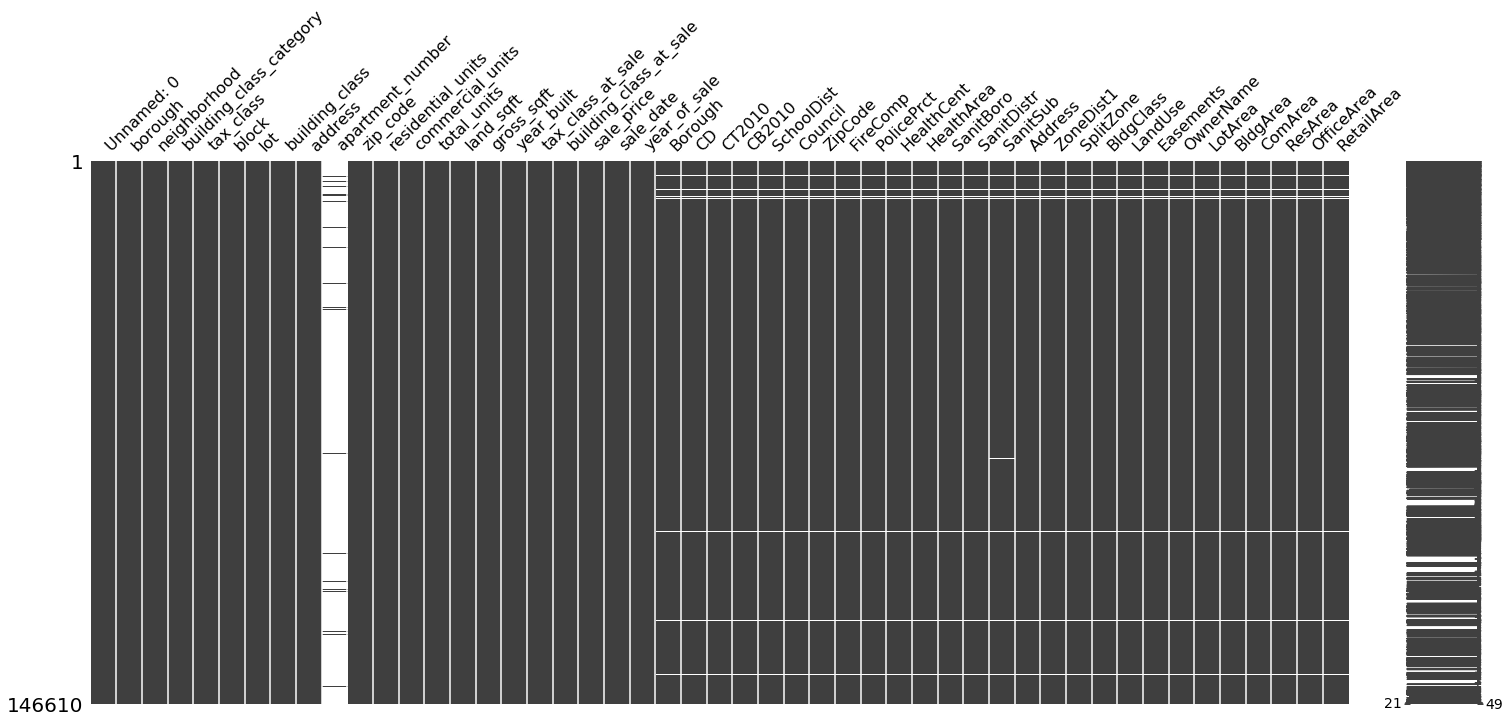

In [11]:
df1=df.iloc[:,:49]
df1.columns

msno.matrix(df1)


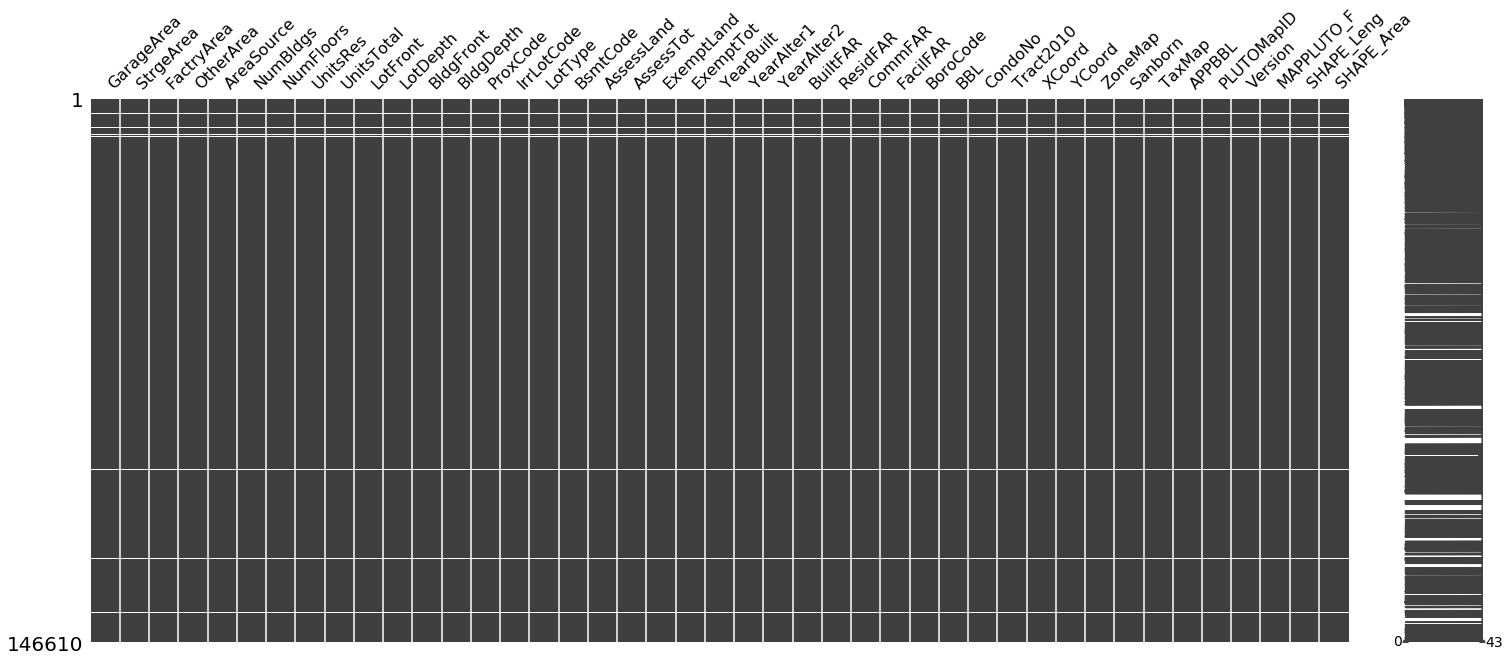

In [12]:
df1=df.iloc[:,49:111]
df1.columns

msno.matrix(df1)

In [65]:
df=df.drop(columns=['BoroCode','CondoNo','Version','apartment_number','OwnerName','Unnamed: 0','borough','address','sale_date','Borough','YCoord','APPBBL','PolicePrct' ,'Easements','AreaSource','Address'],axis=1)
#as no . unique value is only one

In [14]:
df1.columns

Index(['GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo',
       'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 'Sanborn', 'TaxMap',
       'APPBBL', 'PLUTOMapID', 'Version', 'MAPPLUTO_F', 'SHAPE_Leng',
       'SHAPE_Area'],
      dtype='object')

In [15]:
df.isnull().sum()

neighborhood                  0
building_class_category       0
tax_class                     0
block                         0
lot                           0
building_class                0
zip_code                      0
residential_units             0
commercial_units              0
total_units                   0
land_sqft                     0
gross_sqft                    0
year_built                    0
tax_class_at_sale             0
building_class_at_sale        0
sale_price                    0
year_of_sale                  0
CD                         1434
CT2010                     1438
CB2010                     1440
SchoolDist                 1436
Council                    1434
ZipCode                    1434
FireComp                   1436
HealthCent                 1434
HealthArea                 1434
SanitBoro                  1439
SanitDistr                 1439
SanitSub                   1577
ZoneDist1                  1434
                           ... 
UnitsTot

In [16]:
df.columns
columns=df.columns
for col in columns:
    k= df.groupby(col).size()
    print(k)

neighborhood
BATH BEACH                   1918
BAY RIDGE                    4627
BEDFORD STUYVESANT          13131
BENSONHURST                  4206
BERGEN BEACH                 1484
BOERUM HILL                   730
BOROUGH PARK                 5943
BRIGHTON BEACH                854
BROOKLYN HEIGHTS              545
BROOKLYN-UNKNOWN               21
BROWNSVILLE                  2372
BUSH TERMINAL                 434
BUSHWICK                     8577
CANARSIE                     7335
CARROLL GARDENS               904
CLINTON HILL                 1186
COBBLE HILL                   441
COBBLE HILL-WEST              185
CONEY ISLAND                  704
CROWN HEIGHTS                6032
CYPRESS HILLS                4104
DOWNTOWN-FULTON FERRY          95
DOWNTOWN-FULTON MALL          201
DOWNTOWN-METROTECH             52
DYKER HEIGHTS                2475
EAST NEW YORK               10798
FLATBUSH-CENTRAL             3632
FLATBUSH-EAST                7077
FLATBUSH-LEFFERTS GARDEN     1225
F

SanitBoro
1.0         1
2.0         1
3.0    145113
4.0        56
dtype: int64
SanitDistr
1.0      5144
2.0      3626
3.0     14363
4.0      9507
5.0     15331
6.0      5323
7.0      6661
8.0      5401
9.0      3495
10.0     7390
11.0    10148
12.0     6985
13.0     2929
14.0     5079
15.0    10263
16.0     6008
17.0     9104
18.0    18413
55.0        1
dtype: int64
SanitSub
1A    6574
1B    6689
1C    4543
1D    6144
1E    5285
2A    8047
2B    9044
2C    5882
2D    6182
2E    5257
2J      27
2K     127
3A    7299
3B    6334
3C    6229
3D    6070
3E    5816
4A    2327
4B    3136
4C    6659
4D    7359
4E    6547
5A    2022
5B    1675
5C    3669
5D    3116
5E    3434
6C    2295
6D    2209
6E    1897
7C    1105
7D    1223
7E     811
dtype: int64
ZoneDist1
C3             44
C4-1           19
C4-2          193
C4-2A          66
C4-3          458
C4-3A         129
C4-4            5
C4-4A         187
C4-4D          33
C4-4L         229
C4-5D          52
C5-2A          22
C5-4           14
C6

OtherArea
0.0         143063
16.0             1
80.0             1
100.0            3
144.0            1
150.0            1
176.0            2
177.0            2
180.0            3
195.0            1
200.0            8
205.0            1
210.0            1
225.0            2
235.0            1
250.0            1
255.0            1
267.0            2
268.0            3
270.0            1
272.0            2
279.0            2
288.0            2
300.0            5
318.0            1
320.0            2
322.0            1
324.0            2
334.0            1
340.0            1
             ...  
86763.0          1
89457.0          1
95444.0          1
98849.0          1
99941.0          1
100000.0         2
108000.0         1
110000.0         1
110536.0         2
120722.0         1
121000.0         1
123140.0         2
125000.0         1
125924.0         1
128170.0         1
129776.0         2
130500.0         1
135000.0         1
141500.0         1
161669.0         1
170000.0         2
17

CommFAR
0.0     137248
0.5         44
1.0       2925
2.0       3413
3.0        195
3.4        689
4.0        416
4.2         52
5.0          6
6.0         29
10.0        93
12.0        66
dtype: int64
FacilFAR
0.00       584
1.00     12573
2.00     83216
2.40      2866
3.00      6057
4.00      3572
4.20       301
4.80     35052
5.00         4
6.00       272
6.02         8
6.50       511
9.00         1
10.00       93
12.00       66
dtype: int64
BBL
3.000190e+09    1
3.000210e+09    1
3.000220e+09    1
3.000260e+09    1
3.000280e+09    1
3.000300e+09    2
3.000300e+09    1
3.000300e+09    1
3.000300e+09    1
3.000300e+09    1
3.000300e+09    1
3.000300e+09    1
3.000330e+09    1
3.000340e+09    1
3.000340e+09    1
3.000340e+09    1
3.000340e+09    1
3.000340e+09    2
3.000340e+09    1
3.000340e+09    2
3.000340e+09    1
3.000340e+09    2
3.000350e+09    1
3.000350e+09    4
3.000350e+09    1
3.000350e+09    1
3.000360e+09    1
3.000370e+09    2
3.000380e+09    2
3.000410e+09    1
        

In [17]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class', 'block', 'lot',
       'building_class', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'ZoneDist1', 'SplitZone', 'BldgClass',
       'LandUse', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BBL', 'Tract201

In [18]:
df.shape

(146610, 76)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247215 entries, 0 to 390880
Data columns (total 76 columns):
neighborhood               247215 non-null object
building_class_category    247198 non-null object
tax_class                  247180 non-null object
block                      247215 non-null int64
lot                        247215 non-null int64
building_class             247180 non-null object
residential_units          247215 non-null int64
commercial_units           247215 non-null int64
total_units                247215 non-null int64
land_sqft                  247215 non-null float64
gross_sqft                 247215 non-null float64
year_built                 247215 non-null int64
tax_class_at_sale          247215 non-null int64
building_class_at_sale     247215 non-null object
sale_price                 247215 non-null float64
year_of_sale               247215 non-null int64
CD                         193052 non-null float64
CT2010                     193014 non-null 

In [19]:
c = df.corr()

s = c.unstack()


so = s.sort_values(kind="quicksort")
so

#constantlu 

PLUTOMapID         ZipCode             -0.694432
ZipCode            PLUTOMapID          -0.694432
ProxCode           BsmtCode            -0.626885
BsmtCode           ProxCode            -0.626885
ResidFAR           block               -0.518078
block              ResidFAR            -0.518078
BBL                ResidFAR            -0.518078
ResidFAR           BBL                 -0.518078
TaxMap             ResidFAR            -0.508932
ResidFAR           TaxMap              -0.508932
                   HealthArea          -0.483069
HealthArea         ResidFAR            -0.483069
ResidFAR           Council             -0.478062
Council            ResidFAR            -0.478062
tax_class_at_sale  ProxCode            -0.400916
ProxCode           tax_class_at_sale   -0.400916
ResidFAR           SanitDistr          -0.378419
SanitDistr         ResidFAR            -0.378419
CD                 ResidFAR            -0.378291
ResidFAR           CD                  -0.378291
LandUse            Y

In [88]:
df=df.drop(columns=['PLUTOMapID'])   #seeing the above corr

In [155]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class', 'block', 'lot',
       'building_class', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'ZoneDist1', 'SplitZone', 'BldgClass',
       'LandUse', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BBL', 'Tract2010', 'XCoord'

In [15]:
df.shape

(151310, 75)

In [16]:
c=('LtdHeight','SplitZone','BBL','Sanborn','PFIRM15_FL','Version','MAPPLUTO_F')
if c in df.columns:
    print(c)
else:
    print("done for all")


done for all


In [21]:
#df.total_units.nunique(dropna=True)
for a in df.columns:
    score=df.total_units.nunique()
    print("Total unique class  for {} is {}".format(a, score))
#to know if data has text 

Total unique class  for neighborhood is 214
Total unique class  for building_class_category is 214
Total unique class  for tax_class is 214
Total unique class  for block is 214
Total unique class  for lot is 214
Total unique class  for building_class is 214
Total unique class  for zip_code is 214
Total unique class  for residential_units is 214
Total unique class  for commercial_units is 214
Total unique class  for total_units is 214
Total unique class  for land_sqft is 214
Total unique class  for gross_sqft is 214
Total unique class  for year_built is 214
Total unique class  for tax_class_at_sale is 214
Total unique class  for building_class_at_sale is 214
Total unique class  for sale_price is 214
Total unique class  for year_of_sale is 214
Total unique class  for CD is 214
Total unique class  for CT2010 is 214
Total unique class  for CB2010 is 214
Total unique class  for SchoolDist is 214
Total unique class  for Council is 214
Total unique class  for ZipCode is 214
Total unique class

In [89]:
 num_cols = df._get_numeric_data().columns            #to get the numeric data columns
num_cols
a=df.loc[:, df.dtypes == np.object]
set3=a.columns


In [24]:
                                #to chek if the numerical has no categorical 
for col in num_cols:
    k= df.groupby(col).size()
    print(k)
#

block
19       1
20       1
21       1
22       1
26       1
28       1
30       8
31       4
33       1
34      12
35       7
36       6
37       2
38       2
41       6
43       6
44       3
51       3
52       1
55      14
56       8
63       2
64       2
76       2
77       2
86       3
87       3
107      3
108      6
109      2
        ..
8821     1
8823     1
8824    19
8825    13
8826    17
8827    19
8828    23
8829    20
8830    36
8831    20
8832    15
8833     1
8839     2
8845    80
8856    60
8866    87
8876    35
8883    39
8885    30
8891    24
8896     3
8900    70
8907    71
8914    99
8923    42
8925    65
8932    47
8939    43
8946    39
8955    56
Length: 6796, dtype: int64
lot
1       2942
2       1386
3       1649
4       1602
5       1739
6       2001
7       2033
8       1934
9       1907
10      1828
11      1962
12      2210
13      2117
14      2082
15      2171
16      2187
17      2154
18      2211
19      2126
20      2091
21      2107
22      2133
23    

ComArea
0.0          127359
28.0              1
70.0              1
72.0              1
80.0              1
88.0              1
100.0             4
123.0             1
128.0             1
144.0             2
150.0             3
176.0             2
180.0             3
192.0             1
195.0             2
200.0             9
210.0             1
220.0             1
224.0             1
227.0             2
228.0             2
236.0             2
238.0             1
240.0             4
250.0             4
260.0             1
264.0             1
267.0             2
270.0             2
279.0             3
              ...  
229926.0          4
232174.0          1
235700.0          1
244825.0          1
253096.0          2
258000.0          1
260000.0          4
270000.0          2
279162.0          2
280000.0          1
285471.0          1
290356.0          2
290440.0          2
292230.0          1
292886.0          1
304080.0          1
304650.0          1
352015.0          1
374240.0    

AssessTot
0.0            27
1080.0          1
1212.0          1
1365.0          2
1399.0          1
1404.0          1
1641.0          1
1671.0          1
1789.0          1
1800.0          1
1813.0          1
1896.0          7
1939.0          5
2006.0         52
2016.0          1
2026.0         33
2232.0          2
2250.0          1
2283.0          1
2353.0          3
2445.0          5
2510.0          6
2535.0          1
2634.0          3
2754.0          4
2834.0          4
2857.0          2
2863.0         11
2902.0          2
2984.0          1
               ..
22175100.0      1
22194450.0      1
22247100.0      2
22653900.0      2
23129550.0      1
23139900.0      4
23965650.0      1
25463250.0      1
26540550.0      1
26667900.0      1
27166050.0      1
27327150.0      2
28309500.0      2
29519100.0      1
30152250.0      1
30235950.0      1
31304250.0      1
32426550.0      3
32885550.0      2
34103250.0      1
39082950.0      1
40980600.0      1
49412250.0      2
50075100.0      1


SHAPE_Area
2.179204e+02    1
2.758586e+02    1
3.102033e+02    2
3.275368e+02    1
3.297117e+02    1
3.463307e+02    1
3.853331e+02    2
3.943528e+02    1
3.958217e+02    1
3.971418e+02    2
4.152112e+02    1
4.253582e+02    2
4.320661e+02    2
4.392290e+02    1
4.468745e+02    1
4.562678e+02    1
4.738057e+02    1
4.815788e+02    1
4.817994e+02    2
4.837855e+02    1
4.962413e+02    1
4.973287e+02    1
4.977354e+02    1
5.075807e+02    1
5.193760e+02    2
5.201713e+02    1
5.280212e+02    1
5.422460e+02    1
5.434455e+02    2
5.457243e+02    1
               ..
1.940245e+05    4
1.949153e+05    1
2.030949e+05    2
2.032267e+05    2
2.041408e+05    2
2.121022e+05    3
2.175699e+05    2
2.245288e+05    1
2.254129e+05    1
2.307628e+05    1
2.322320e+05    1
2.324489e+05    1
2.442912e+05    1
2.454001e+05    2
2.549916e+05    2
2.580259e+05    1
2.737508e+05    1
3.126399e+05    3
3.191087e+05    1
3.194044e+05    2
3.443665e+05    2
3.699310e+05    2
4.206207e+05    1
4.375532e+05    2

In [90]:
cols=df.columns
set1=set(cols) - set(num_cols)                #categorical values columns 
set2={'YearBuilt','tax_class','year_of_sale','CD','SchoolDist','Council','ZipCode','HealthCent','SanitBoro','SanitDistr','LandUse','NumBldgs','NumFloors','ProxCode','LotType','BsmtCode','YearBuilt','YearAlter1','YearAlter2','MAPPLUTO_F','FacilFAR','CommFAR','ResidFAR','Sanborn'}
categorical=set1.union(set2, set3)
categorical
#remove area source

{'Address',
 'BldgClass',
 'Borough',
 'BsmtCode',
 'CD',
 'CommFAR',
 'Council',
 'FacilFAR',
 'FireComp',
 'HealthCent',
 'IrrLotCode',
 'LandUse',
 'LotType',
 'MAPPLUTO_F',
 'NumBldgs',
 'NumFloors',
 'OwnerName',
 'ProxCode',
 'ResidFAR',
 'Sanborn',
 'SanitBoro',
 'SanitDistr',
 'SanitSub',
 'SchoolDist',
 'SplitZone',
 'Version',
 'YearAlter1',
 'YearAlter2',
 'YearBuilt',
 'ZipCode',
 'ZoneDist1',
 'ZoneMap',
 'address',
 'apartment_number',
 'building_class',
 'building_class_at_sale',
 'building_class_category',
 'neighborhood',
 'sale_date',
 'tax_class',
 'year_of_sale'}

In [91]:
numerical=list(set(cols) - set(categorical))
numerical

['zip_code',
 'ComArea',
 'block',
 'GarageArea',
 'LotArea',
 'SHAPE_Area',
 'OtherArea',
 'ExemptLand',
 'BBL',
 'ResArea',
 'BldgDepth',
 'APPBBL',
 'land_sqft',
 'HealthArea',
 'RetailArea',
 'FactryArea',
 'UnitsRes',
 'AssessTot',
 'lot',
 'StrgeArea',
 'sale_price',
 'PolicePrct',
 'residential_units',
 'Unnamed: 0',
 'BldgArea',
 'YCoord',
 'LotDepth',
 'Tract2010',
 'TaxMap',
 'XCoord',
 'CB2010',
 'gross_sqft',
 'year_built',
 'CT2010',
 'OfficeArea',
 'BldgFront',
 'UnitsTotal',
 'LotFront',
 'total_units',
 'SHAPE_Leng',
 'ExemptTot',
 'AreaSource',
 'borough',
 'Easements',
 'BuiltFAR',
 'CondoNo',
 'commercial_units',
 'tax_class_at_sale',
 'AssessLand',
 'BoroCode']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A78D2E27F0>,
      dtype=object)

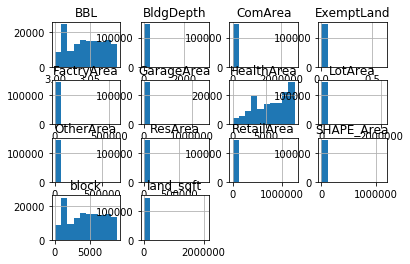

In [29]:
df.hist(column=numerical[1:15])   #data is skewed   

#but we wnt remove the skewness as this skewness may be of great importance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DA260556D8>,
      dtype=object)

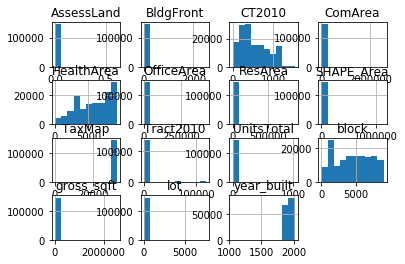

In [21]:
df.hist(column=numerical[15:30]) 

In [30]:
df.shape

(146610, 75)

In [92]:
#mode imputation 
cols_mode = categorical 
for column in cols_mode:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [93]:
#catogorical imputation using knn 
cols_mode = categorical 
for column in cols_mode:
    df[column]= df[column].astype('category')


In [94]:
cols_mode = numerical
for column in cols_mode:
    df[column].fillna(df[column].median(), inplace=True)


In [548]:
df.dtypes

neighborhood               category
building_class_category    category
tax_class                  category
block                         int64
lot                           int64
building_class             category
residential_units             int64
commercial_units              int64
total_units                   int64
land_sqft                   float64
gross_sqft                  float64
year_built                    int64
tax_class_at_sale             int64
building_class_at_sale     category
sale_price                  float64
year_of_sale               category
CD                         category
CT2010                      float64
CB2010                      float64
SchoolDist                 category
Council                    category
ZipCode                    category
FireComp                   category
HealthCent                 category
HealthArea                  float64
SanitBoro                  category
SanitDistr                 category
SanitSub                   c

In [95]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
columns=df_num.columns
for col in columns:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print("clearing for ", col)
    df[col] = np.where(df[col] >Q3, Q3,df[col])
    df[col] = np.where(df[col] <Q1, Q1,df[col])

clearing for  Unnamed: 0
clearing for  borough
clearing for  block
clearing for  lot
clearing for  zip_code
clearing for  residential_units
clearing for  commercial_units
clearing for  total_units
clearing for  land_sqft
clearing for  gross_sqft
clearing for  year_built
clearing for  tax_class_at_sale
clearing for  sale_price
clearing for  CT2010
clearing for  CB2010
clearing for  PolicePrct
clearing for  HealthArea
clearing for  Easements
clearing for  LotArea
clearing for  BldgArea
clearing for  ComArea
clearing for  ResArea
clearing for  OfficeArea
clearing for  RetailArea
clearing for  GarageArea
clearing for  StrgeArea
clearing for  FactryArea
clearing for  OtherArea
clearing for  AreaSource
clearing for  UnitsRes
clearing for  UnitsTotal
clearing for  LotFront
clearing for  LotDepth
clearing for  BldgFront
clearing for  BldgDepth
clearing for  AssessLand
clearing for  AssessTot
clearing for  ExemptLand
clearing for  ExemptTot
clearing for  BuiltFAR
clearing for  BoroCode
clearing

In [35]:
c = df.corr()

s = c.unstack()


so = s.sort_values(kind="quicksort")
so

BBL                BuiltFAR            -0.494669
BuiltFAR           BBL                 -0.494669
TaxMap             BuiltFAR            -0.494435
BuiltFAR           TaxMap              -0.494435
block              BuiltFAR            -0.490620
BuiltFAR           block               -0.490620
                   HealthArea          -0.476373
HealthArea         BuiltFAR            -0.476373
XCoord             sale_price          -0.442424
sale_price         XCoord              -0.442424
XCoord             AssessTot           -0.345330
AssessTot          XCoord              -0.345330
sale_price         CT2010              -0.344864
CT2010             sale_price          -0.344864
BBL                UnitsRes            -0.344516
UnitsRes           BBL                 -0.344516
                   TaxMap              -0.343421
TaxMap             UnitsRes            -0.343421
block              total_units         -0.342619
total_units        block               -0.342619
UnitsRes           b

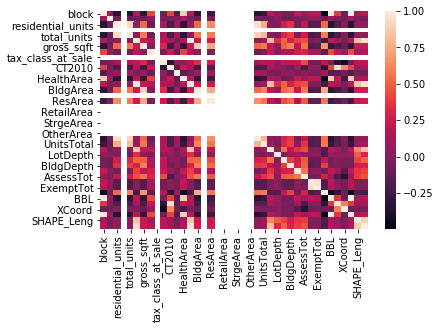

In [42]:
g=sns.heatmap(df.corr())

In [96]:
#df=df.drop(columns=['TaxMap'],axis=1)
#df=df.drop(columns=['GarageArea'],axis=1)
df=df.drop(columns=['tax_class_at_sale','ResArea','TaxMap','GarageArea','StrgeArea','FactryArea','OtherArea','RetailArea','commercial_units','ComArea','OfficeArea'],axis=1)
#df=df.drop(columns=['StrgeArea','FactryArea','OtherArea','RetailArea'],axis=1)
#df=df.drop(columns=['commercial_units','ComArea','OfficeArea'],axis=1)

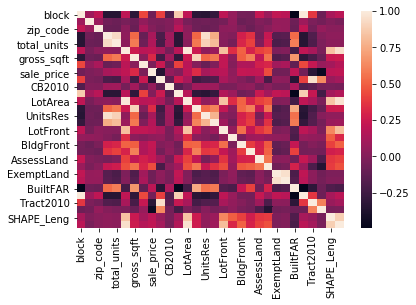

In [37]:
g=sns.heatmap(df.corr())

In [26]:
for cols in df.columns:
    print(df[cols].value_counts())


BEDFORD STUYVESANT       13678
EAST NEW YORK            11268
BUSHWICK                  8908
CANARSIE                  7619
FLATBUSH-EAST             7325
CROWN HEIGHTS             6260
BOROUGH PARK              6119
OCEAN HILL                5342
BAY RIDGE                 4718
SUNSET PARK               4670
GRAVESEND                 4336
BENSONHURST               4314
CYPRESS HILLS             4256
FLATBUSH-CENTRAL          3727
SHEEPSHEAD BAY            3632
MARINE PARK               3268
FLATBUSH-NORTH            3070
OCEAN PARKWAY-NORTH       2827
MIDWOOD                   2658
DYKER HEIGHTS             2522
BROWNSVILLE               2462
OLD MILL BASIN            2461
MADISON                   2404
OCEAN PARKWAY-SOUTH       2035
PARK SLOPE                2012
FLATLANDS                 1973
BATH BEACH                1973
GREENPOINT                1965
WILLIAMSBURG-EAST         1924
BERGEN BEACH              1505
                         ...  
MILL BASIN                1166
PARK SLO

0.0         132903
1000.0         524
1100.0         369
2000.0         281
1500.0         257
2500.0         233
1600.0         222
1200.0         214
1800.0         185
900.0          184
800.0          175
5000.0         156
1400.0         153
1375.0         145
1089.0         135
4000.0         130
1300.0         125
10000.0        124
2200.0         115
3000.0         114
1250.0         108
990.0          102
2400.0         101
6000.0          98
1625.0          95
1900.0          82
1280.0          82
960.0           82
1700.0          81
1240.0          80
             ...  
20600.0          1
41176.0          1
165500.0         1
1684.0           1
5146.0           1
2386.0           1
14385.0          1
41150.0          1
5141.0           1
15638.0          1
10315.0          1
5159.0           1
1097.0           1
7209.0           1
923.0            1
14433.0          1
10728.0          1
465.0            1
2585.0           1
10337.0          1
2510.0           1
1902.0      

0.0       148568
2008.0       255
2009.0       242
2006.0       209
2010.0       203
2004.0       181
2012.0       179
2013.0       169
2014.0       168
2015.0       167
2011.0       159
2005.0       137
2007.0       132
2016.0       129
2003.0        93
2000.0        46
1998.0        34
1999.0        33
2001.0        33
1996.0        30
2002.0        28
1997.0        28
1995.0        15
1990.0         9
1993.0         7
1991.0         6
1994.0         6
1992.0         6
1989.0         5
1985.0         4
1988.0         3
1987.0         3
1967.0         3
1976.0         3
1973.0         2
1963.0         2
1972.0         2
1984.0         2
1975.0         1
1970.0         1
1969.0         1
1968.0         1
1978.0         1
1966.0         1
1964.0         1
1960.0         1
2017.0         1
Name: YearAlter2, dtype: int64
1.00     2679
1.35     2650
1.20     2529
1.09     2350
1.50     2154
1.80     2144
0.80     1596
1.65     1554
0.64     1546
0.70     1530
1.26     1505
0.90     1475
0.

In [38]:
df.describe()

,block,lot,zip_code,residential_units,total_units,land_sqft,gross_sqft,year_built,sale_price,CT2010,...,AssessLand,AssessTot,ExemptLand,ExemptTot,BuiltFAR,BBL,Tract2010,XCoord,SHAPE_Leng,SHAPE_Area
count,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,...,146610.000000,146610.000000,146610.000000,146610.000000,146610.000000,1.466100e+05,146610.000000,1.466100e+05,146610.000000,146610.000000
mean,4402.971721,38.232508,11220.261265,2.021267,2.088241,2174.905920,2569.291481,1923.047978,587116.522672,498.042823,...,8899.357586,31266.283596,408.008383,436.589046,1.146945,3.044201e+09,530.930694,9.993406e+05,247.079948,2231.190098
std,1933.838849,16.330120,8.570246,0.757124,0.762133,301.818345,643.816934,10.107983,179960.747905,209.656571,...,2897.050290,8978.807111,682.054673,697.130316,0.324495,1.909601e+07,240.616946,6.504326e+03,8.656210,321.486902
min,1865.000000,19.000000,11210.000000,1.000000,1.000000,1838.000000,1806.000000,1910.000000,380000.000000,266.000000,...,5509.000000,21105.000000,0.000000,0.000000,0.770000,3.018980e+09,269.000000,9.907592e+05,236.960754,1878.956669
25%,1865.000000,19.000000,11210.000000,1.000000,1.000000,1838.000000,1806.000000,1910.000000,380000.000000,266.000000,...,5509.000000,21105.000000,0.000000,0.000000,0.770000,3.018980e+09,269.000000,9.907594e+05,236.960754,1878.956669
50%,4600.000000,37.000000,11220.000000,2.000000,2.000000,2003.000000,2501.000000,1925.000000,560000.000000,431.000000,...,8515.000000,29476.000000,0.000000,0.000000,1.090000,3.046130e+09,442.000000,9.999430e+05,245.540196,2129.314039
75%,6675.000000,59.000000,11231.000000,3.000000,3.000000,2565.000000,3384.000000,1935.000000,825000.000000,780.000000,...,12712.562500,43461.000000,1550.000000,1550.000000,1.570000,3.066690e+09,856.000000,1.007047e+06,258.553609,2662.536752
max,6675.000000,59.000000,11231.000000,3.000000,3.000000,2565.000000,3384.000000,1935.000000,825000.000000,780.000000,...,12712.750000,43461.000000,1550.000000,1550.000000,1.570000,3.066690e+09,856.000000,1.007047e+06,258.553668,2662.537792


In [82]:
#the average sale  price of the house is $780934
#the average area of the house is 200803 sqr feet 


,block,lot,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,sale_price,...,AssessTot,ExemptLand,ExemptTot,BuiltFAR,BBL,Tract2010,XCoord,TaxMap,SHAPE_Leng,SHAPE_Area
0,140,1001,0,1,1,0.0,0.0,2002,4,499401179.0,...,35111.0,0.0,0.0,1.30,3.047410e+09,442.0,997685.0,31504.0,250.515969,2372.193895
1,54,1,0,0,0,134988.0,0.0,0,4,345000000.0,...,1571850.0,1571850.0,1571850.0,0.00,3.000540e+09,21.0,988208.0,30101.0,1559.889144,140131.577176
2,204,1,0,0,0,32000.0,304650.0,1924,4,340000000.0,...,25463250.0,0.0,0.0,9.52,3.002040e+09,1.0,985952.0,30106.0,890.718521,34656.447240
3,8470,55,0,123,123,905000.0,2548000.0,1970,4,276947000.0,...,149792400.0,0.0,0.0,2.82,3.084700e+09,698.0,1006597.0,32502.0,3729.786857,797554.847834
4,230,1,0,1,1,20267.0,356000.0,1927,4,202500000.0,...,27166050.0,2250000.0,27166050.0,17.57,3.002300e+09,301.0,985622.0,30106.0,620.761169,21360.147631


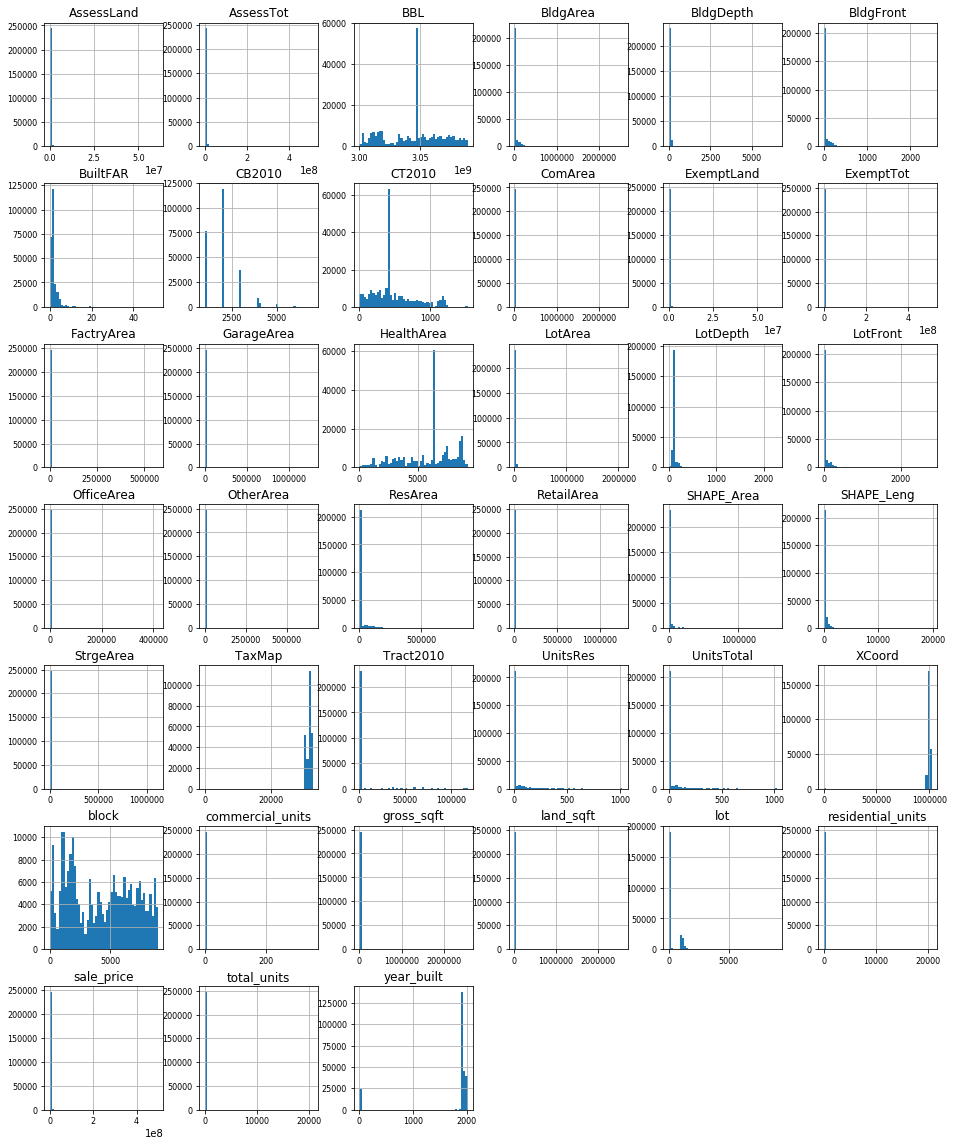

In [25]:
#numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
#here we get a insight that the distribution of BBL and CT2010 is similar 
#and that of BldgFront,LotDepth,LotFront,BuiltFar has similar distribution 


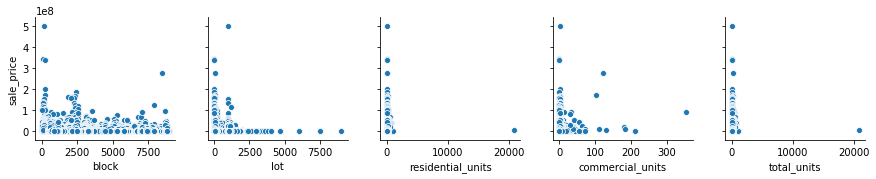

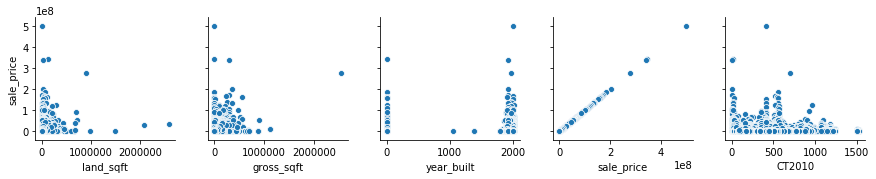

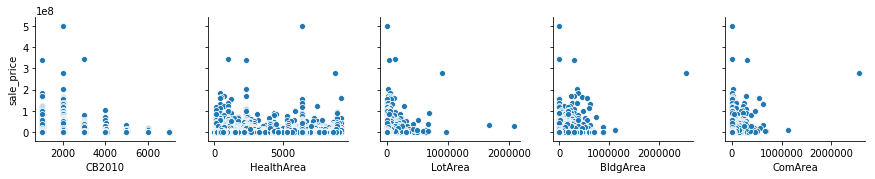

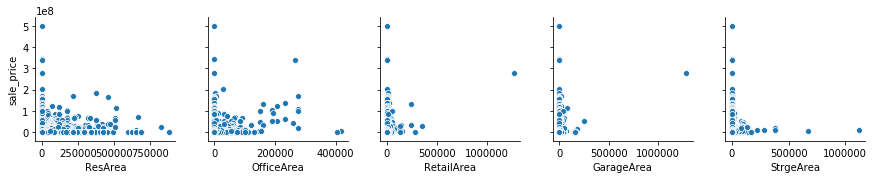

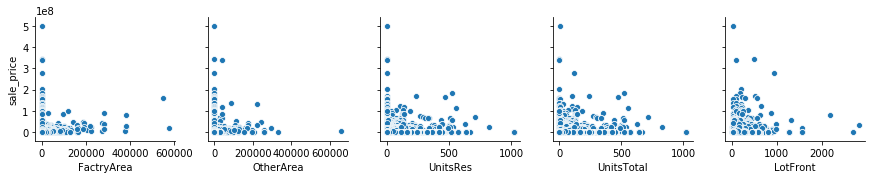

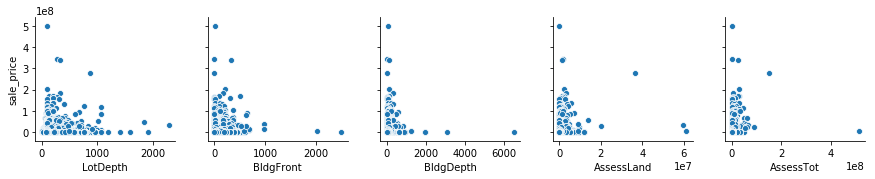

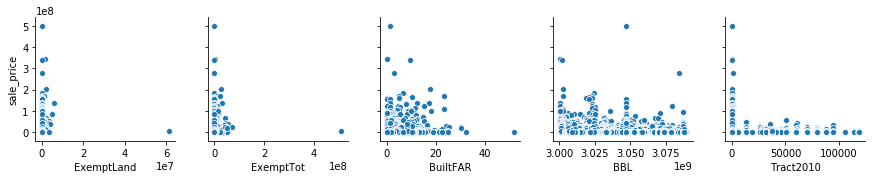

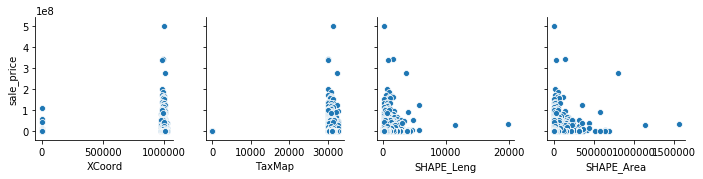

In [203]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['sale_price'])
    
#here we clearly see that none of the predictor variables have a linear relationship with the target variables 

In [ ]:
#there seems to be a linear relationship between the gross_sqrft, BlgArea,ComArea,BuiltFar,LotFront have a linear relation with the sell price
#we will have to explore it furthure 

In [ ]:
#we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

#Plot the numerical features and see which ones have very few or explainable outliers
#Remove the outliers from these features and see which one can have a good correlation without their outliers


In [551]:
df_num.columns

Index(['block', 'lot', 'residential_units', 'commercial_units', 'total_units',
       'land_sqft', 'gross_sqft', 'year_built', 'tax_class_at_sale',
       'sale_price', 'CT2010', 'CB2010', 'HealthArea', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'BuiltFAR', 'BBL', 'Tract2010',
       'XCoord', 'TaxMap', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object')

In [84]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class', 'block', 'lot',
       'building_class', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'ZoneDist1', 'SplitZone', 'BldgClass',
       'LandUse', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BBL', 'Tract2010', 'XCoord'

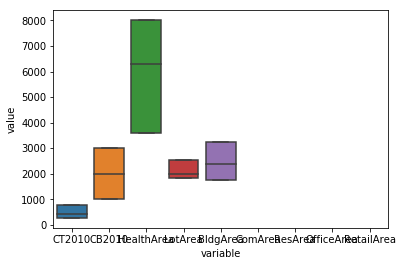

In [97]:
boxplot1 = pd.DataFrame(data = df, columns = ['CT2010',
       'CB2010', 'HealthArea', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea'])

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot1))

plt.show()

#removing outliers 

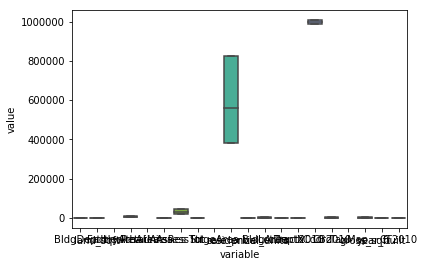

In [54]:
#boxplot1 = pd.DataFrame(data = df, columns = numerical[10:30])

#sns.boxplot(x="variable", y="value", data=pd.melt(boxplot1))

#plt.show()

#removed outlier for all numerical values 


In [236]:
df.head()

,neighborhood,building_class_category,tax_class,block,lot,building_class,residential_units,commercial_units,total_units,land_sqft,...,BBL,Tract2010,XCoord,ZoneMap,Sanborn,TaxMap,PLUTOMapID,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
1,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,G7,0,0,0,134988.0,...,3.000540e+09,21.0,988208.0,12d,302 016,30101.0,1.0,0.0,1559.889144,140131.577176
2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,O6,0,0,0,32000.0,...,3.002040e+09,1.0,985952.0,12d,302 004,30106.0,1.0,0.0,890.718521,34656.447240
3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,K6,0,123,123,905000.0,...,3.084700e+09,698.0,1006597.0,23b,319 077,32502.0,1.0,0.0,3729.786857,797554.847834
4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,H8,0,1,1,20267.0,...,3.002300e+09,301.0,985622.0,12d,302 014,30106.0,1.0,0.0,620.761169,21360.147631
5,WILLIAMSBURG-SOUTH,31 COMMERCIAL VACANT LAND,4,2428,1,V1,0,0,0,57600.0,...,3.024280e+09,551.0,993500.0,12d,303 007,30806.0,1.0,0.0,1006.337999,58564.864312


In [98]:
X=df.copy()
X.head()
print(X.shape)

(146610, 80)


In [60]:
X.dtypes

neighborhood               category
building_class_category    category
tax_class                  category
block                       float64
lot                         float64
building_class             category
total_units                 float64
land_sqft                   float64
gross_sqft                  float64
year_built                  float64
building_class_at_sale     category
sale_price                  float64
year_of_sale               category
CD                         category
CT2010                      float64
CB2010                      float64
SchoolDist                 category
Council                    category
ZipCode                    category
FireComp                   category
HealthCent                 category
HealthArea                  float64
SanitBoro                  category
SanitDistr                 category
SanitSub                   category
ZoneDist1                  category
SplitZone                  category
BldgClass                  c

In [99]:
#just label encoder to be used for xgboost 
for column in categorical:
    print(df[column].value_counts())
    X[column]=LabelEncoder().fit_transform(X[column])
    
    


2.00      81188
3.00      36522
1.00       8976
4.00       7422
2.50       5884
2.75       2205
6.00       1196
0.00        762
5.00        727
1.50        403
1.75        311
7.00        251
3.50        179
8.00        120
1.67         76
3.75         49
12.00        42
4.50         37
9.00         30
10.00        23
2.25         20
11.00        16
13.00        12
2.67         12
15.00        11
23.00        10
3.25          9
16.00         9
3.67          9
1.25          9
          ...  
28.00         4
4.33          4
2.40          3
24.00         3
30.00         3
25.00         3
51.00         2
3.30          2
26.00         2
37.00         2
27.00         2
18.00         2
1.20          1
2.33          1
1.10          1
2.45          1
119.00        1
2.70          1
3.33          1
5.50          1
5.75          1
75.00         1
21.00         1
22.00         1
28.50         1
33.00         1
34.00         1
42.00         1
57.00         1
6.25          1
Name: NumFloors, Length:

3.0    146552
4.0        56
2.0         1
1.0         1
Name: SanitBoro, dtype: int64
0.0       143937
2008.0       248
2009.0       237
2010.0       201
2006.0       200
2004.0       180
2012.0       178
2013.0       164
2015.0       163
2014.0       161
2011.0       157
2005.0       133
2007.0       130
2016.0       125
2003.0        90
2000.0        45
1998.0        33
1999.0        30
2001.0        30
1996.0        29
2002.0        27
1997.0        27
1995.0        15
1990.0         8
1993.0         7
1991.0         6
1994.0         6
1992.0         6
1989.0         5
1985.0         4
1988.0         3
1987.0         3
1967.0         3
1976.0         3
1963.0         2
1972.0         2
1973.0         2
1984.0         2
1975.0         1
1970.0         1
1969.0         1
1968.0         1
1978.0         1
1966.0         1
1960.0         1
2017.0         1
Name: YearAlter2, dtype: int64
3.0    55868
2.0    41667
1.0    24587
0.0    24488
Name: ProxCode, dtype: int64
B1    21500
C0    21

318.0    19819
305.0    15270
303.0    14441
315.0    10312
311.0    10052
304.0     9556
317.0     9132
310.0     7326
312.0     7184
307.0     6590
316.0     6038
308.0     5371
306.0     5288
314.0     5130
301.0     5109
302.0     3606
309.0     3435
313.0     2950
355.0        1
Name: CD, dtype: int64
USM ASSET TRUST - SER    1572
SILVERSHORE PROPERTIE      68
PENRITH URF LLC            66
NEHEMIAH HOUSING DEVE      64
DEUTSCHE BANK NATIONA      40
ELITE PROPERTIES NYC       36
NRL URF LLC                34
NYC REO LLC                31
2166 DEAN LLC              30
U.S. BANK NATIONAL AS      26
CONTACT HOLDINGS CORP      23
GUREVITCH, MENACHEM        21
VINEGAR HILL ASSET LL      21
SANCHEZ, CARLOS            21
AZULAY, ELI                19
IWC BED-STUY PORTFOLI      18
FSNR ACQUISITION GROU      18
THOMAS, DONAVAN            17
SIMKO, JAN                 17
MONDESIR, LIESL            17
COHEN, DAVID               17
CONGREGATION IMREI YE      17
FEDERAL NATIONAL MORT      16
CO

In [100]:
#removal on basis of skewness as it can add bias to the data 

#X=X.drop(columns=['SanitBoro','LotFront','Council','MAPPLUTO_F','building_class_at_sale'], axis=1)
X.columns
X=X[X.YearBuilt > 0]

In [87]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class', 'block', 'lot',
       'building_class', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council',
       'ZipCode', 'FireComp', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'ZoneDist1', 'SplitZone', 'BldgClass',
       'LandUse', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BBL', 'Tract2010', 'XCoord'

In [103]:
train_y = X["sale_price"]
train_X = X.drop(["sale_price"], axis=1)

In [104]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

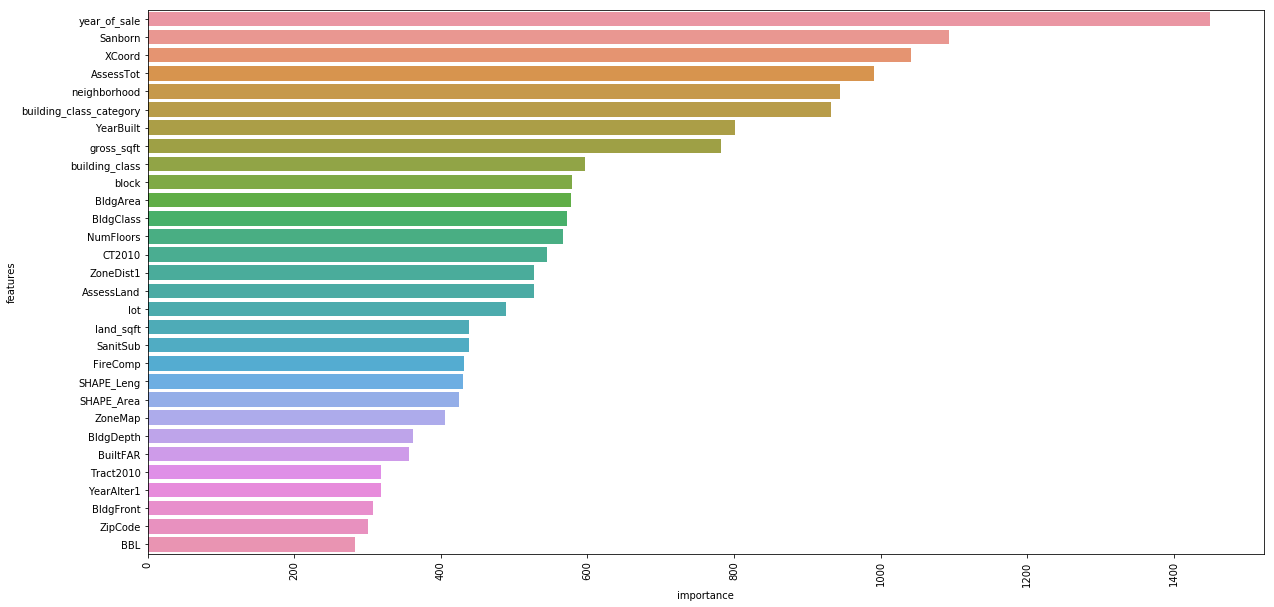

In [105]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(30),x="importance",y="features",ax=ax,orient="h")

In [66]:
features

,features,importance
1,year_of_sale,1412
0,XCoord,1128
2,AssessTot,1089
41,Sanborn,974
31,building_class_category,861
16,YearBuilt,858
8,neighborhood,853
24,gross_sqft,820
38,building_class,669
30,block,630


In [ ]:
topFeatures = features["features"].tolist()[:30]

In [107]:
print(topFeatures)

#['year_of_sale', 'neighborhood', 'block', 'building_class_category', 'land_sqft', 'gross_sqft', 'AssessTot', 'lot', 'year_built', 'building_class', 'AssessLand', 'CT2010', 'XCoord', 'building_class_at_sale', 'Sanborn', 'residential_units', 'ExemptTot', 'total_units', 'ZoneMap', 'commercial_units', 'ExemptLand', 'BldgDepth', 'OfficeArea', 'LotFront', 'ResidFAR', 'ZoneDist1', 'BldgArea', 'LotDepth', 'ComArea', 'BBL']

['year_of_sale', 'Sanborn', 'XCoord', 'AssessTot', 'neighborhood', 'building_class_category', 'YearBuilt', 'gross_sqft', 'building_class', 'block', 'BldgArea', 'BldgClass', 'NumFloors', 'CT2010', 'ZoneDist1', 'AssessLand', 'lot', 'land_sqft', 'SanitSub', 'FireComp', 'SHAPE_Leng', 'SHAPE_Area', 'ZoneMap', 'BldgDepth', 'BuiltFAR', 'Tract2010', 'YearAlter1', 'BldgFront', 'ZipCode', 'BBL']


In [140]:
for cols in topFeatures:
    print(df[cols].value_counts())

2005    22613
2004    22607
2006    20297
2003    20058
2007    18106
2015    16126
2014    16071
2013    15940
2017    15845
2016    15160
2008    14327
2012    13896
2011    13247
2010    11810
2009    11112
Name: year_of_sale, dtype: int64
BEDFORD STUYVESANT          17514
EAST NEW YORK               12714
BAY RIDGE                    9978
BUSHWICK                     9623
BOROUGH PARK                 8871
CANARSIE                     8780
CROWN HEIGHTS                8775
PARK SLOPE                   8650
SHEEPSHEAD BAY               8472
FLATBUSH-EAST                8228
GRAVESEND                    6655
SUNSET PARK                  6539
FLATBUSH-CENTRAL             5978
OCEAN HILL                   5770
OCEAN PARKWAY-NORTH          5518
BENSONHURST                  5265
BROOKLYN HEIGHTS             4721
BRIGHTON BEACH               4717
MIDWOOD                      4406
CYPRESS HILLS                4368
WILLIAMSBURG-NORTH           4317
GREENPOINT                   4241
WILLIAMSB

1920.0    72636
1930.0    16318
1910.0    16008
1925.0    14666
1899.0    14265
1931.0    12601
1901.0    10507
1960.0     5889
1940.0     4890
1950.0     4168
1905.0     3770
0.0        3759
1915.0     3658
1935.0     3456
1955.0     3420
1965.0     2437
2005.0     2348
1900.0     2313
1963.0     2104
2004.0     1990
1928.0     1982
1945.0     1857
1964.0     1760
1927.0     1507
1962.0     1470
1958.0     1429
1961.0     1285
2006.0     1237
2007.0     1171
1953.0     1150
          ...  
1847.0        4
1831.0        4
1865.0        4
1884.0        3
1888.0        3
1853.0        3
1839.0        3
1832.0        3
1869.0        3
1834.0        2
1887.0        2
1891.0        2
1825.0        2
1838.0        2
1864.0        2
1826.0        1
1822.0        1
1816.0        1
1874.0        1
1837.0        1
1841.0        1
1843.0        1
1870.0        1
1883.0        1
1857.0        1
1859.0        1
1861.0        1
1875.0        1
1866.0        1
1886.0        1
Name: YearBuilt, Length:

4000.0    62255
2090.0    61959
2760.0    54520
3000.0     2299
2400.0     1950
2700.0     1820
3600.0     1455
3300.0     1451
2160.0     1378
2200.0      885
3120.0      864
3200.0      823
2280.0      818
2520.0      768
2100.0      748
2880.0      662
2640.0      599
2480.0      569
2800.0      556
3360.0      552
3240.0      543
2430.0      538
2320.0      525
2560.0      503
3750.0      500
2250.0      473
2600.0      472
2500.0      446
2240.0      422
3900.0      418
          ...  
2269.0        1
3667.0        1
3343.0        1
2333.0        1
3934.0        1
3857.0        1
3658.0        1
2629.0        1
3587.0        1
3813.0        1
3805.0        1
2689.0        1
3043.0        1
3796.0        1
3879.0        1
2602.0        1
2309.0        1
3301.0        1
3873.0        1
3959.0        1
3543.0        1
3701.0        1
3353.0        1
3389.0        1
3973.0        1
3143.0        1
3446.0        1
2539.0        1
3803.0        1
2807.0        1
Name: BldgArea, Length: 

0.0       215963
2008.0      1869
2015.0      1854
2013.0      1713
2006.0      1613
2009.0      1574
2012.0      1512
2014.0      1478
2011.0      1412
2007.0      1402
2010.0      1382
2005.0      1304
2004.0      1048
1985.0      1041
2016.0       869
1987.0       776
1994.0       712
1988.0       688
1984.0       654
2000.0       594
1986.0       544
1989.0       532
1982.0       526
1979.0       491
2003.0       480
1981.0       465
1983.0       394
2001.0       368
1990.0       331
1980.0       326
           ...  
1954.0        13
1973.0        11
1977.0        10
1974.0         9
1942.0         9
1956.0         8
1912.0         7
1936.0         7
1952.0         4
1955.0         4
1950.0         3
1931.0         3
1911.0         2
1919.0         2
1902.0         2
1937.0         2
2017.0         2
1938.0         2
1940.0         2
1941.0         2
1945.0         2
1951.0         2
1935.0         1
1943.0         1
1922.0         1
1917.0         1
1947.0         1
1949.0        

In [58]:
df.head()

,sale_price,block,neighborhood,year_of_sale,building_class_category,Sanborn,building_class,building_class_at_sale,AssessTot,XCoord,lot,YearBuilt,gross_sqft,land_sqft,year_built,NumFloors,FireComp,ZoneDist1,SanitSub,AssessLand
2,812500.0,1863.0,BROOKLYN HEIGHTS,2016,21 OFFICE BUILDINGS,302 004,O6,O6,43461.0,990843.0,19.0,1924.0,3388.0,2563.0,1924.0,13.0,E205,M2-1,1A,12705.0
3,812500.0,6670.0,MILL BASIN,2012,22 STORE BUILDINGS,319 077,K6,K6,43461.0,1006597.0,55.0,1970.0,3388.0,2563.0,1935.0,2.0,E323,M3-1,4E,12705.0
4,812500.0,1863.0,BROOKLYN HEIGHTS,2017,26 OTHER HOTELS,302 014,H8,H8,43461.0,990843.0,19.0,1927.0,3388.0,2563.0,1927.0,15.0,E205,R6,1A,12705.0
6,812500.0,1863.0,BROOKLYN HEIGHTS,2017,21 OFFICE BUILDINGS,302 018,O4,O4,43461.0,990843.0,44.0,1928.0,3388.0,2563.0,1928.0,37.0,E205,C5-2A,1B,12705.0
7,812500.0,2307.0,WILLIAMSBURG-NORTH,2015,08 RENTALS - ELEVATOR APARTMENTS,304 018,D8,D8,43461.0,997307.0,19.0,2012.0,3388.0,2563.0,1935.0,6.0,E229,M1-2/R6A,3B,12705.0


In [192]:
print(topFeatures)

['year_of_sale', 'Sanborn', 'XCoord', 'AssessTot', 'neighborhood', 'building_class_category', 'YearBuilt', 'gross_sqft', 'building_class', 'block', 'BldgArea', 'BldgClass', 'NumFloors', 'CT2010', 'ZoneDist1', 'AssessLand', 'lot', 'land_sqft', 'SanitSub', 'FireComp', 'SHAPE_Leng', 'SHAPE_Area', 'ZoneMap', 'BldgDepth', 'BuiltFAR', 'Tract2010', 'YearAlter1', 'BldgFront', 'ZipCode', 'BBL']


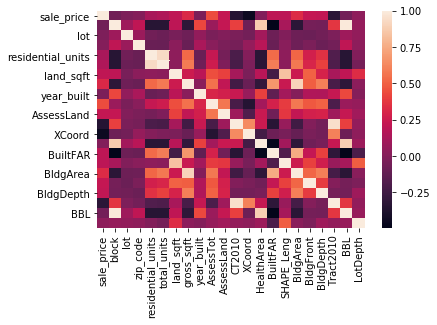

In [101]:
#df1 = df[['sale_price','year_of_sale', 'Sanborn', 'AssessTot', 'YearBuilt', 'neighborhood', 'building_class_category', 'block', 'building_class', 'gross_sqft', 'CT2010', 'land_sqft', 'AssessLand', 'BldgClass', 'ZoneDist1', 'BldgArea', 'FireComp', 'ResArea', 'NumFloors', 'ZipCode', 'lot', 'SanitSub', 'YearAlter1', 'Tract2010', 'ZoneMap', 'HealthArea', 'BuiltFAR', 'BldgDepth', 'SchoolDist', 'CB2010', 'year_built']]
df1=df[['sale_price','block', 'lot','Sanborn', 'zip_code', 'residential_units','NumFloors', 'building_class_category', 'total_units', 'land_sqft','gross_sqft', 'year_built', 'year_of_sale','neighborhood','AssessTot','AssessLand','CT2010','SchoolDist','XCoord','building_class','HealthArea', 'BuiltFAR','ZoneMap','YearAlter1','SHAPE_Leng','building_class','BldgArea','ZoneDist1','BldgFront','BldgDepth','Tract2010','BBL','LotDepth']]
#df1=df1.drop(columns=['commercial_units'],axis=1)
#df1=df[['sale_price','year_of_sale', 'neighborhood', 'block', 'building_class_category', 'land_sqft', 'gross_sqft', 'AssessTot', 'lot', 'year_built', 'building_class', 'AssessLand', 'CT2010', 'XCoord', 'building_class_at_sale', 'Sanborn', 'residential_units', 'ExemptTot', 'total_units', 'ZoneMap', 'commercial_units', 'ExemptLand', 'BldgDepth', 'OfficeArea', 'LotFront', 'ResidFAR', 'ZoneDist1', 'BldgArea', 'LotDepth', 'ComArea', 
        #'BBL']]
       
#df1=df1.drop(columns=['gross_sqft','BldgArea','LotDepth','BBL','OfficeArea','ComArea','commercial_units','ExemptTot','residential_units'], axis=1) 
#ddf1=df1.drop(columns=['BldgArea','Tract2010','HealthArea'],axis=1)
g=sns.heatmap(df1.corr())

In [293]:
for cols in df1.columns:
    print(df1[cols].value_counts())

812500.0    37837
360400.0    37837
450000.0     1829
600000.0     1822
550000.0     1698
400000.0     1695
650000.0     1628
700000.0     1450
500000.0     1415
750000.0     1386
800000.0     1252
425000.0      962
475000.0      905
575000.0      872
525000.0      836
375000.0      812
625000.0      805
560000.0      736
460000.0      730
675000.0      727
480000.0      719
420000.0      711
540000.0      710
580000.0      707
490000.0      700
430000.0      695
530000.0      686
380000.0      669
520000.0      643
440000.0      623
            ...  
473417.0        1
473405.0        1
684618.0        1
369900.0        1
375050.0        1
684200.0        1
684100.0        1
684081.0        1
683770.0        1
683750.0        1
472929.0        1
472872.0        1
472855.0        1
472828.0        1
472787.0        1
472770.0        1
683333.0        1
683308.0        1
683200.0        1
472520.0        1
682890.0        1
682657.0        1
472400.0        1
682636.0        1
472326.0  

B1    22211
C0    21811
B3    14147
B2    13260
A5    10882
B9     9357
A1     8958
A9     8632
C3     5658
C2     5424
S2     4530
C1     3798
A2     2035
S1     1683
A4     1567
V0     1488
S9     1137
K1     1045
S3      885
S4      834
S5      810
C7      748
D1      741
F9      688
E9      626
K4      544
G9      529
K2      473
K9      463
V1      444
      ...  
D8        2
O4        2
N4        2
Y6        2
Y2        2
J1        2
L1        2
R9        2
A6        2
Y3        1
Y4        1
Y1        1
W6        1
R1        1
U7        1
U5        1
U4        1
T9        1
T2        1
H3        1
HB        1
HR        1
J9        1
Z8        1
K8        1
N3        1
O3        1
R4        1
Q3        1
H6        1
Name: building_class_at_sale, Length: 156, dtype: int64
267.00    38273
784.00    37890
431.00     1822
702.01     1107
628.00      988
369.00      837
696.02      804
415.00      684
385.00      614
387.00      606
301.00      588
403.00      587
383.00      581
401.

In [217]:
c = df1.corr()

s = c.unstack()


so = s.sort_values(kind="quicksort")
so

BuiltFAR           BBL                 -0.494669
BBL                BuiltFAR            -0.494669
block              BuiltFAR            -0.490620
BuiltFAR           block               -0.490620
                   HealthArea          -0.476373
HealthArea         BuiltFAR            -0.476373
XCoord             sale_price          -0.442424
sale_price         XCoord              -0.442424
XCoord             AssessTot           -0.345330
AssessTot          XCoord              -0.345330
CT2010             sale_price          -0.344864
sale_price         CT2010              -0.344864
total_units        block               -0.342619
block              total_units         -0.342619
BBL                total_units         -0.341980
total_units        BBL                 -0.341980
residential_units  block               -0.339659
block              residential_units   -0.339659
BBL                residential_units   -0.339577
residential_units  BBL                 -0.339577
BuiltFAR           C

In [199]:
df1.head()
df1.isnull().sum()

sale_price                 0
year_of_sale               0
neighborhood               0
block                      0
building_class_category    0
land_sqft                  0
gross_sqft                 0
lot                        0
year_built                 0
building_class             0
AssessLand                 0
CT2010                     0
XCoord                     0
building_class_at_sale     0
Sanborn                    0
residential_units          0
ExemptTot                  0
ZoneMap                    0
commercial_units           0
ExemptLand                 0
BldgDepth                  0
OfficeArea                 0
ResidFAR                   0
ZoneDist1                  0
LotDepth                   0
ComArea                    0
dtype: int64

In [207]:
df1.dtypes

sale_price                  float64
year_of_sale               category
neighborhood               category
block                         int64
building_class_category    category
land_sqft                   float64
gross_sqft                  float64
lot                           int64
year_built                    int64
building_class             category
AssessLand                  float64
CT2010                      float64
XCoord                      float64
building_class_at_sale     category
Sanborn                    category
residential_units             int64
ExemptTot                   float64
ZoneMap                    category
commercial_units              int64
ExemptLand                  float64
BldgDepth                   float64
OfficeArea                  float64
ResidFAR                   category
ZoneDist1                  category
LotDepth                    float64
ComArea                     float64
dtype: object

In [102]:
#df1=df1.drop(['BldgArea'],axis=1)
#df1=df1.drop(['building_class_category'],axis=1)
dfdummies=pd.get_dummies(df1,drop_first=True,prefix_sep='_')
dfdummies.dtypes

sale_price           float64
block                float64
lot                  float64
zip_code             float64
residential_units    float64
total_units          float64
land_sqft            float64
gross_sqft           float64
year_built           float64
AssessTot            float64
AssessLand           float64
CT2010               float64
XCoord               float64
HealthArea           float64
BuiltFAR             float64
SHAPE_Leng           float64
BldgArea             float64
BldgFront            float64
BldgDepth            float64
Tract2010            float64
BBL                  float64
LotDepth             float64
Sanborn_300 000        uint8
Sanborn_301 002        uint8
Sanborn_301 003        uint8
Sanborn_301 0032       uint8
Sanborn_301 004        uint8
Sanborn_301 005        uint8
Sanborn_301 008        uint8
Sanborn_301 011        uint8
                      ...   
ZoneDist1_M2-1         uint8
ZoneDist1_M3-1         uint8
ZoneDist1_M3-2         uint8
ZoneDist1_R1-2

In [486]:
dfdummies

,sale_price,block,XCoord,AssessTot,gross_sqft,year_built,lot,AssessLand,SHAPE_Leng,LotFront,...,ZipCode_11233.0,ZipCode_11234.0,ZipCode_11235.0,ZipCode_11236.0,ZipCode_11237.0,ZipCode_11238.0,ZipCode_11239.0,ZipCode_11241.0,ZipCode_11249.0,ZipCode_11416.0
0,760000.0,1663.0,997624.0,35257.0,0.0,1957.0,120.0,10082.0,250.662145,24.67,...,0,1,0,0,0,0,0,0,0,0
1,760000.0,1663.0,991997.0,75296.0,0.0,1910.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,0,0
2,760000.0,1663.0,991997.0,75296.0,2800.0,1924.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,0,0
3,760000.0,6566.0,1002883.5,75296.0,2800.0,1957.0,55.0,16956.0,272.732308,30.00,...,0,1,0,0,0,0,0,0,0,0
4,760000.0,1663.0,991997.0,75296.0,2800.0,1927.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,0,0
5,760000.0,2428.0,993500.0,75296.0,0.0,1910.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,1,0
6,760000.0,1663.0,991997.0,75296.0,2800.0,1928.0,44.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,1,0,0
7,760000.0,2307.0,997307.0,75296.0,2800.0,1957.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,0,0
8,760000.0,2128.0,992807.0,75296.0,0.0,1910.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,1,0
9,760000.0,1876.0,993650.0,75296.0,2800.0,1912.0,21.0,16956.0,272.732308,30.00,...,0,0,0,0,0,0,0,0,0,0


In [256]:
df.head()

,neighborhood,building_class_category,tax_class,block,lot,building_class,residential_units,commercial_units,total_units,land_sqft,...,BBL,Tract2010,XCoord,ZoneMap,Sanborn,TaxMap,PLUTOMapID,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,1863.0,19.0,O6,1.0,0.0,2.0,2563.0,...,3.018930e+09,270.0,990843.0,12d,302 004,30701.0,1.0,0.0,258.549326,2663.075561
3,MILL BASIN,22 STORE BUILDINGS,4,6670.0,55.0,K6,1.0,0.0,3.0,2563.0,...,3.066590e+09,698.0,1006597.0,23b,319 077,32004.0,1.0,0.0,258.549326,2663.075561
4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,1863.0,19.0,H8,1.0,0.0,2.0,2563.0,...,3.018930e+09,301.0,990843.0,12d,302 014,30701.0,1.0,0.0,258.549326,2663.075561
6,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,1863.0,44.0,O4,1.0,0.0,3.0,2563.0,...,3.018930e+09,270.0,990843.0,12d,302 018,30701.0,1.0,0.0,258.549326,2663.075561
7,WILLIAMSBURG-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2,2307.0,19.0,D8,3.0,0.0,3.0,2563.0,...,3.023070e+09,519.0,997307.0,13a,304 018,30804.0,1.0,0.0,258.549326,2663.075561


In [46]:

a=df1.loc[:, df.dtypes==('float64','int64')]
a.columns

Index(['sale_price', 'XCoord', 'AssessTot', 'gross_sqft', 'block', 'CT2010',
       'ResArea', 'lot', 'AssessLand', 'BuiltFAR', 'SHAPE_Leng', 'CB2010'],
      dtype='object')

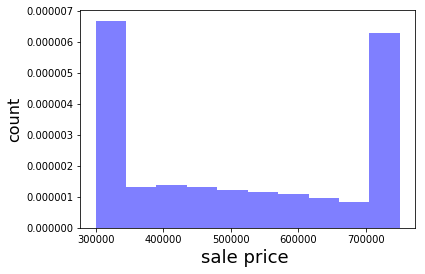

In [313]:
num_bins = 10
plt.hist(df['sale_price'], num_bins, normed=1, facecolor='blue', alpha=0.5)
#fig.subtitle('price distribution ', fontsize=20)
plt.xlabel('sale price ', fontsize=18)
plt.ylabel('count', fontsize=16)

plt.show()

#wecan see that mose of the sale price is between 3000-3500 and 7000-7500

Text(0, 0.5, 'Sale_Price')

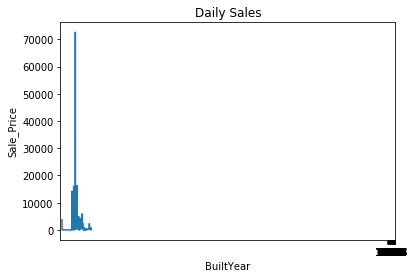

In [320]:
# By Day
sales_by_day = df.groupby('YearBuilt').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1970,2019))
plot_by_day.set_xlabel('BuiltYear')
plot_by_day.set_ylabel('Sale_Price')

Text(0, 0.5, 'count')

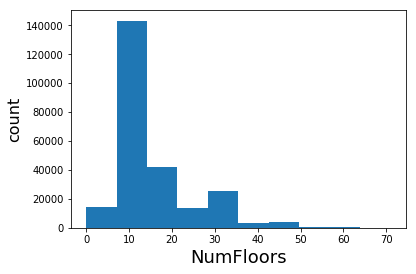

In [345]:
plt.hist(df1["NumFloors"])
#the no of floors is 10-20 in most of the construction this can mean that there is more demand in the buildings that have10 or more floors
plt.xlabel('NumFloors', fontsize=18)
plt.ylabel('count', fontsize=16)


In [215]:
Xdummies =dfdummies.drop('sale_price',axis=1)
ydummies =dfdummies.sale_price

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn import metrics
X_dummiestrain, X_dummiestest, y_train, y_test = train_test_split(Xdummies, ydummies,test_size=0.20, random_state=123)
linreg = LinearRegression()

linreg.fit(X_dummiestrain, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [218]:
#ro check overfitting 

from sklearn.metrics import mean_squared_error, r2_score
y_pred_train =linreg.predict(X_dummiestrain)
y_pred_test = linreg.predict(X_dummiestest)
print(linreg.score(X_dummiestrain, y_train)*100,'% Prediction Accuracy   for train set ')


#The RMSE is the square root of the variance of the residuals.  

#Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train ))
r2_train = r2_score(y_train,y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
r2_test = r2_score(y_test,y_pred_test)
print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Train Set: ', r2_train)
print('Root mean squared error on Testing Set', rmse_test)
print('R2 score on Testing Set: ',r2_test)

55.21635206683217 % Prediction Accuracy   for train set 
Root mean squared error on Training Set 120372.1106460909
R2 score on Train Set:  0.5521635206683218
Root mean squared error on Testing Set 122653.75877103652
R2 score on Testing Set:  0.537264332223087


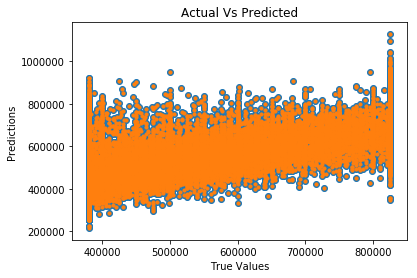

In [220]:
plt.scatter( y_test,y_pred_test)        #here we will get the actual vs predicted to get a fresidual relations 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Actual Vs Predicted')

plt.scatter(y_test,y_pred_test, s=10)
#plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
################################################### End  ##################################################################

In [221]:
#Ridge is not required as our data doesnt overfit and just done for practice
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=0) #Keeping any alpha and tol is not improving the performance so removed it
ridge_reg.fit(X_dummiestrain, y_train)
y_pred_ridge =ridge_reg.predict(X_dummiestest)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 122558.78431473045
R2 score on Testing Set:  0.5379806747755198


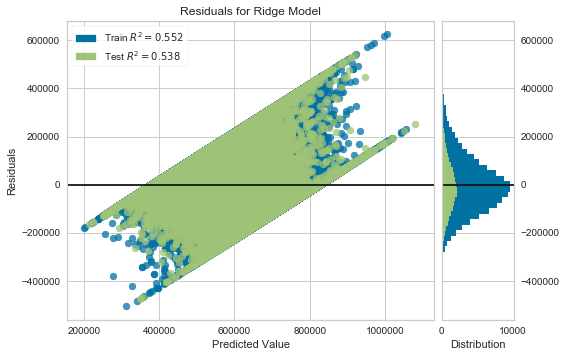

In [222]:
# Instantiate the linear model and visualizer # Insta 
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model, hist=True)

visualizer.fit(X_dummiestrain, y_train)  # Fit the training data to the visualizer
visualizer.score(X_dummiestest, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the da


#Yellowbrick's ResidualsPlot Visualizer also displays a histogram of the error values along the right-hand side. In the example above, the error is normally distributed around zero, which also generally indicates a well-fitted model. If the histogram is not desired, it can be turned off with the hist=False flag.

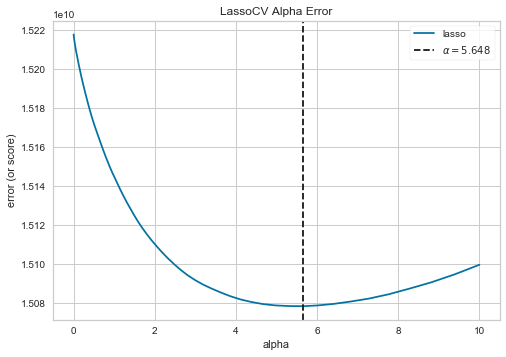

In [223]:
#selection alpha 
import numpy as np

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
#using lasso as the data is multicolinear 
from yellowbrick.regressor.alphas import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_dummiestrain, y_train)
g = visualizer.poof()

#used yellowbrick package which worked on the graph to give the optimum value of alpha 

In [224]:
#data doesnt overfit just done for our practice 
#Lasso with alpha 0
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0,random_state=0)
lasso.fit(X_dummiestrain,y_train)
y_pred_lasso = lasso.predict(X_dummiestest)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 122628.77780935832
R2 score on Testing Set:  0.5374528043078617


In [286]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=4.974,random_state=0)
lasso.fit(X_dummiestrain,y_train)
y_pred_lasso = lasso.predict(X_dummiestest)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Testing Set 130908.41531929611
R2 score on Testing Set:  0.503419127435119


In [31]:
X_dummiestrain.shape

(117288, 2186)